In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
bert = pd.read_csv("test_res.csv")
total = bert.count()
bert

,y_test,y_prob,y_pred,id,correct
0,0.0,0.809096,1.0,13894r 100114f,False
1,1.0,0.303592,0.0,118859r 92809r,False
2,1.0,0.876864,1.0,84633f 5449r,True
3,1.0,0.175065,0.0,10145r 125068r,False
4,0.0,0.105641,0.0,14737r 70824r,True
...,...,...,...,...,...
2755,0.0,0.333389,0.0,124488r 109272r,True
2756,0.0,0.666237,1.0,100256r 43009f,False
2757,1.0,0.891711,1.0,6470f 46268f,True
2758,0.0,0.706829,1.0,35282f 16011f,False


In [3]:
# count fraction of unconfident predictions
c1 = bert[(bert['y_prob'] >= 0.2) & (bert['y_prob'] <=0.8)].count()
print(c1/total*100)

# count fraction of extremely unconfident
c2 = bert[(bert['y_prob'] >= 0.45) & (bert['y_prob'] <=0.55)].count()
print(c2/total*100)



y_test     43.07971
y_prob     43.07971
y_pred     43.07971
id         43.07971
correct    43.07971
dtype: float64
y_test     5.108696
y_prob     5.108696
y_pred     5.108696
id         5.108696
correct    5.108696
dtype: float64


<AxesSubplot:>

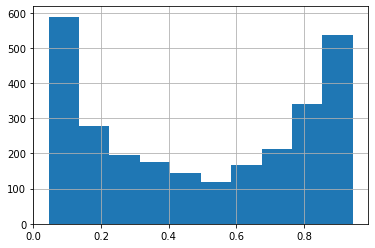

In [57]:
bert['y_prob'].hist(bins=10)

In [61]:
bert[(bert['y_prob'] >= 0.49) & (bert['y_prob'] <=0.51)].sort_values(by="y_prob")

,y_test,y_prob,y_pred,id,correct
96,0.0,0.490578,0.0,122549f 87334r,True
368,1.0,0.491363,0.0,108710r 62651f,False
2746,1.0,0.491631,0.0,110447r 81749r,False
1911,1.0,0.492267,0.0,60687r 100653f,False
1742,0.0,0.493558,0.0,55211f 123199f,True
2163,0.0,0.494584,0.0,90644r 73083r,True
2486,0.0,0.495344,0.0,91889f 27718r,True
44,0.0,0.498829,0.0,45920f 15333r,True
1978,0.0,0.499178,0.0,83060r 10056f,True
1351,0.0,0.499469,0.0,5412r 67106f,True


In [58]:
bert_wrong = bert[bert['correct']==False]
very_wrong = bert_wrong[(bert_wrong['y_prob'] <= 0.1) | (bert_wrong['y_prob'] >= 0.9)]
very_wrong.sort_values(by=['y_prob']).reset_index(drop=True)

,y_test,y_prob,y_pred,id,correct
0,1.0,0.052759,0.0,105687f 8944r,False
1,1.0,0.053308,0.0,116635r 99113f,False
2,1.0,0.053692,0.0,80515f 90810r,False
3,1.0,0.055470,0.0,106560f 62310r,False
4,1.0,0.055834,0.0,23893r 68639f,False
...,...,...,...,...,...
114,0.0,0.929160,1.0,100755r 75645f,False
115,0.0,0.929930,1.0,5051r 76762f,False
116,0.0,0.931569,1.0,86627r 82122r,False
117,0.0,0.931831,1.0,117378r 43924f,False


In [43]:
sampled_problems = pickle.load(open(
            '../../data/science/paths.pkl', 'rb'), encoding='latin1')

texts = dict()
print('loading problem plain texts')
for id_num in sampled_problems:
    f_short = sampled_problems[id_num]['forward']['short']
    r_short = sampled_problems[id_num]['reverse']['short']
    texts[id_num+'f'] = f_short
    texts[id_num+'r'] = r_short

loading problem plain texts


In [64]:
# ambiguous case
# 49580r and 111622f, prob 0.499995
print(texts['49580r'])
print(texts['111622f'])

Area <--RelatedTo--> Desk <--RelatedTo--> Board <--RelatedTo--> Field 
Doctor --IsA--> Person --NotDesires--> Dream <--RelatedTo--> Wave 


In [63]:
# very wrong case
# 105687f 8944r, prob 0.052759 but y is 1
print(texts['105687f'])
print(texts['83357f'])

House <--RelatedTo--> Doctor <--RelatedTo--> People <--RelatedTo--> Community 
Nation <--RelatedTo--> People --AtLocation--> Doctor <--RelatedTo--> Person 


In [1]:
import torch
from dataset import Dataset
from learn import train, test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
features = [
    'v_enc_dim300',
    'v_freq_freq',
    'v_deg',
    'v_sense',
    'e_vertexsim',
    'e_dir', 'e_rel',
    'e_weightsource',
    'e_srank_rel',
    'e_trank_rel',
    'e_sense'
]

device = "cpu"
split_frac = 0.8
dataset = Dataset(features, split_frac, device)

loading v_enc_dim300
loading v_freq_freq
loading v_deg
loading v_sense
loading e_vertexsim
loading e_dir
loading e_rel
loading e_weightsource
loading e_srank_rel
loading e_trank_rel
loading e_sense
loading problem plain texts
loading labeled pairs


In [5]:
(v_A, e_A), (v_B, e_B), y, ids = dataset.get_test_pairs(randomize_dir=False, return_id=True)

In [7]:
id_A, id_B = ids

In [8]:
# 49580r and 111622f
# 105687f 8944r

p1_A = id_A.index('49580r')
p1_B = id_B.index('111622f')
p2_A = id_A.index('105687f')
p2_B = id_B.index('8944r')

ValueError: '49580r' is not in list

In [9]:
id_B.index('49580r')

ValueError: '49580r' is not in list